In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


In [31]:
df = pd.read_csv("train.csv")
df.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [32]:
df = df[['Date','Weekly_Sales']]
df.columns = ['Date','Sales']
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)
df.head()


,Sales
Date,
2010-02-05,24924.50
2010-02-05,15552.08
2010-02-05,3200.22
2010-02-05,10820.05
2010-02-05,20055.64


In [33]:
df = df.resample('W').sum()
df.head()


,Sales
Date,
2010-02-07,49750740.50
2010-02-14,48336677.63
2010-02-21,48276993.78
2010-02-28,43968571.13
2010-03-07,46871470.30


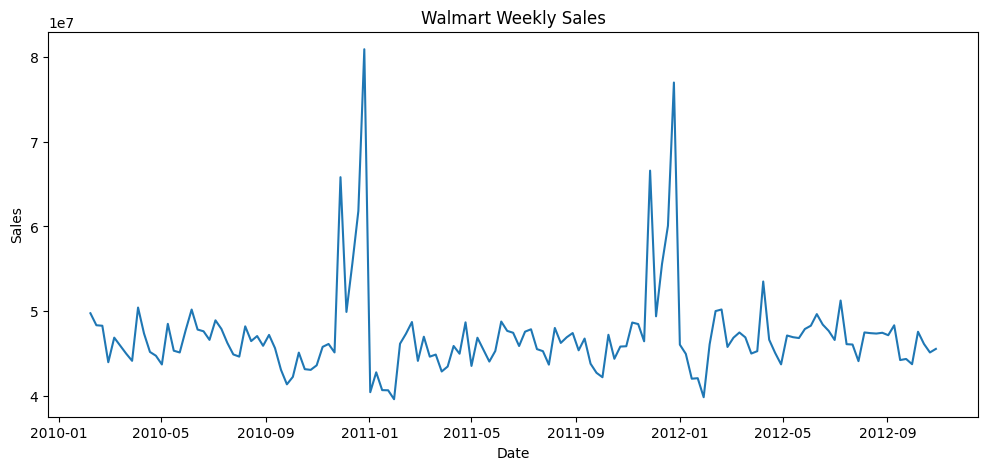

In [34]:
plt.figure(figsize=(12,5))
plt.plot(df['Sales'])
plt.title("Walmart Weekly Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


In [35]:
train = df[:-20]
test = df[-20:]


In [36]:
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()


In [37]:
forecast = model_fit.forecast(steps=20)
forecast


2012-06-17    4.898855e+07
2012-06-24    4.895430e+07
2012-07-01    4.873192e+07
2012-07-08    4.899390e+07
2012-07-15    4.869744e+07
2012-07-22    4.886959e+07
2012-07-29    4.881607e+07
2012-08-05    4.890790e+07
2012-08-12    4.879311e+07
2012-08-19    4.887939e+07
2012-08-26    4.882952e+07
2012-09-02    4.886402e+07
2012-09-09    4.882382e+07
2012-09-16    4.886320e+07
2012-09-23    4.883570e+07
2012-09-30    4.885385e+07
2012-10-07    4.883802e+07
2012-10-14    4.885374e+07
2012-10-21    4.884048e+07
2012-10-28    4.884993e+07
Freq: W-SUN, Name: predicted_mean, dtype: float64

In [38]:
rmse = np.sqrt(mean_squared_error(test, forecast))
print("RMSE:", rmse)


RMSE: 2841487.321776299


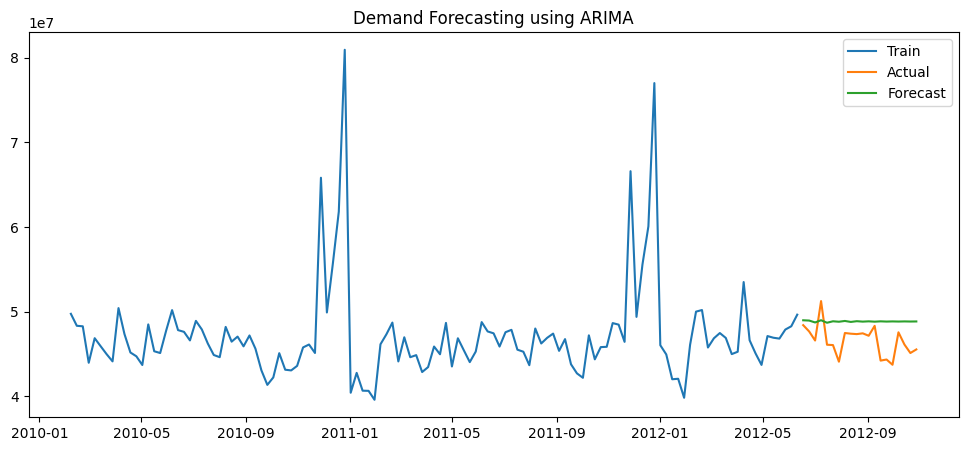

In [39]:
plt.figure(figsize=(12,5))
plt.plot(train, label="Train")
plt.plot(test, label="Actual")
plt.plot(forecast, label="Forecast")
plt.legend()
plt.title("Demand Forecasting using ARIMA")
plt.show()


In [40]:
future = model_fit.forecast(steps=10)
print(future)


2012-06-17    4.898855e+07
2012-06-24    4.895430e+07
2012-07-01    4.873192e+07
2012-07-08    4.899390e+07
2012-07-15    4.869744e+07
2012-07-22    4.886959e+07
2012-07-29    4.881607e+07
2012-08-05    4.890790e+07
2012-08-12    4.879311e+07
2012-08-19    4.887939e+07
Freq: W-SUN, Name: predicted_mean, dtype: float64


In [42]:
df.to_csv("retail_sales2.csv")
